# Analysis of TV Shows and Movies on Netflix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
nf = "https://raw.githubusercontent.com/ygterl/EDA-Netflix-2020-in-R/master/netflix_titles.csv"

In [3]:
df = pd.read_csv(nf)

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
eda = df.drop(columns = 'description')
#discarding the description column

In [7]:
eda

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [8]:
m = eda.dropna()
#Discarding the rows with nan values

In [9]:
m

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers"
...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV"
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure"
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas"
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand..."


# Seperation of TV Shows and Movies 

In [10]:
tv_show = m.loc[m['type'] == 'TV Show']

In [11]:
tv_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
161,81000389,TV Show,The Hockey Girls,"Kiko Cruz Claverol, Patricia Font","Iria del Río, Nora Navas, Josep Linuesa, Natàl...",Spain,"September 20, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas"
247,80202129,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,"September 15, 2017",2016,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas"
333,81004113,TV Show,Age of Rebellion,Peter Ho,"Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou...",Taiwan,"September 1, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
466,80203920,TV Show,Nowhere Man,DJ Chen,"Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-...",Taiwan,"October 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
474,81166978,TV Show,"Bring It On, Ghost",Park Joon-hwa,"Taecyeon, Kim So-hyun, Kwon Yul, Kim Sang-ho, ...",South Korea,"October 30, 2019",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."
...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV"
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure"
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas"
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand..."


In [12]:
movies = m.loc[m['type'] == 'Movie']

In [13]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers"
...,...,...,...,...,...,...,...,...,...,...,...
5574,80104237,Movie,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,"April 1, 2017",2016,TV-MA,81 min,"Dramas, International Movies"
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers"
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies"
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies"


# Analysis of Movies and TV Shows on Netflix

<AxesSubplot:xlabel='type', ylabel='count'>

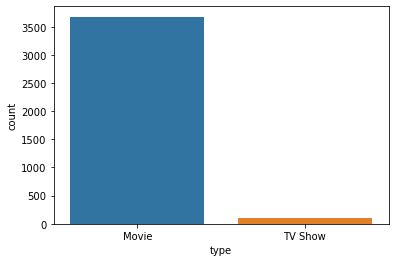

In [15]:
sns.countplot(x = 'type', data = m)

<AxesSubplot:xlabel='rating', ylabel='count'>

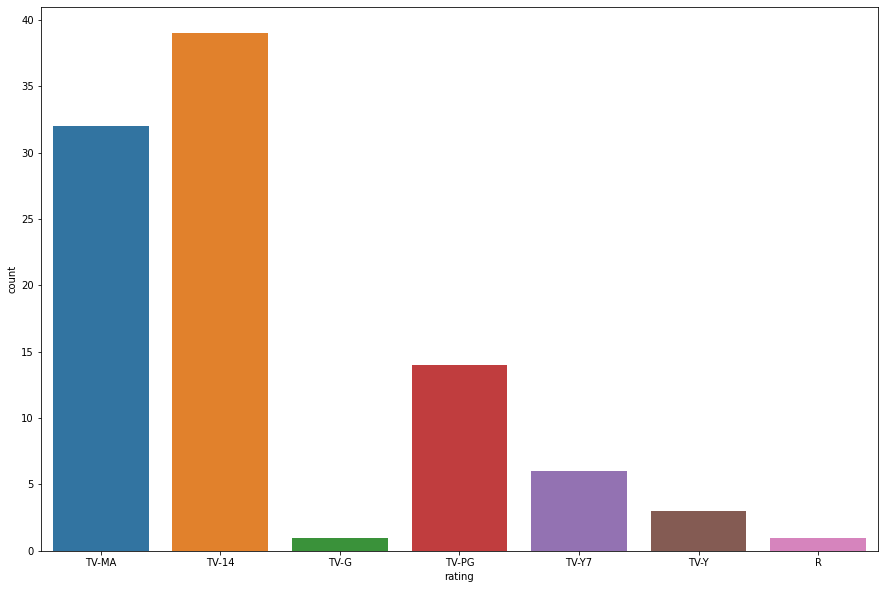

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x = 'rating', data = tv_show)

<AxesSubplot:xlabel='rating', ylabel='count'>

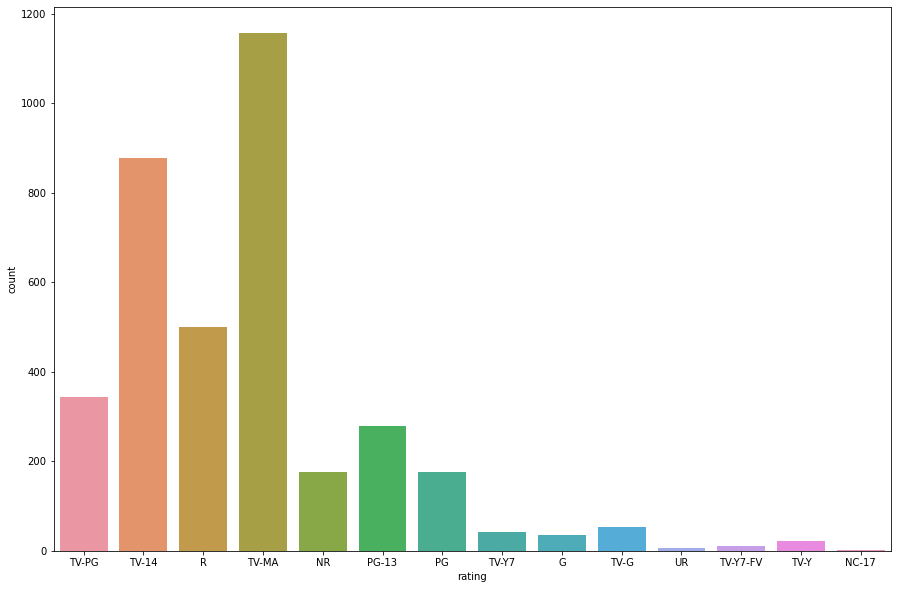

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='rating',data=movies)

# Analysis on Directors

<AxesSubplot:>

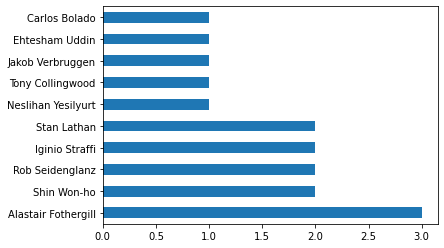

In [19]:
tv_show['director'].value_counts()[:10].plot(kind = 'barh')

<AxesSubplot:>

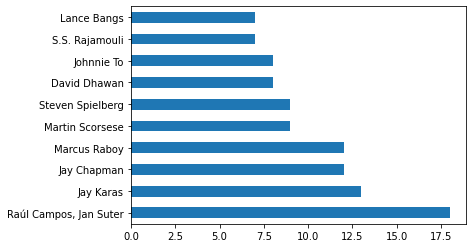

In [20]:
movies['director'].value_counts()[:10].plot(kind = 'barh')

# Analysis on the Genre

<AxesSubplot:ylabel='listed_in'>

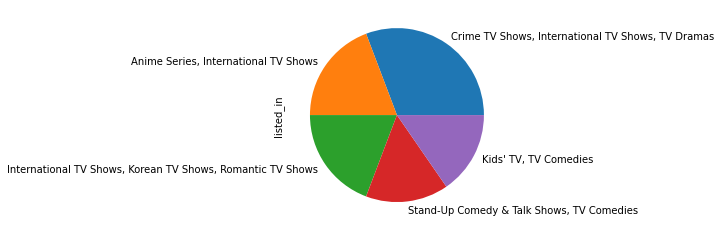

In [21]:
tv_show['listed_in'].value_counts()[:5].plot(kind = 'pie')

<AxesSubplot:ylabel='listed_in'>

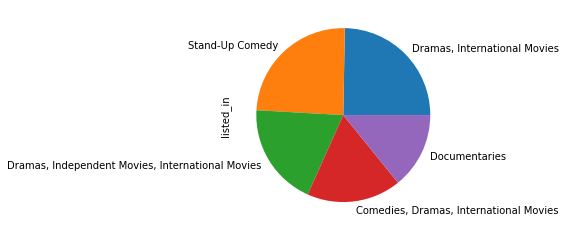

In [22]:
movies['listed_in'].value_counts()[:5].plot(kind = 'pie')

# Classification on the duration

<AxesSubplot:ylabel='duration'>

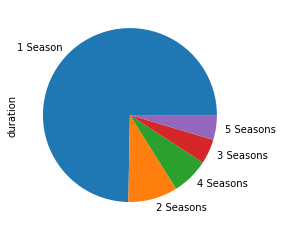

In [23]:
tv_show['duration'].value_counts()[:5].plot(kind = 'pie')

<AxesSubplot:ylabel='duration'>

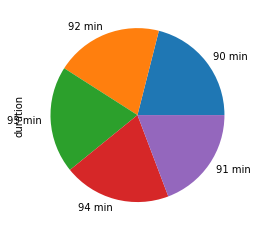

In [24]:
movies['duration'].value_counts()[:5].plot(kind = 'pie')

# Categorizing on the basis of the release year

<AxesSubplot:ylabel='release_year'>

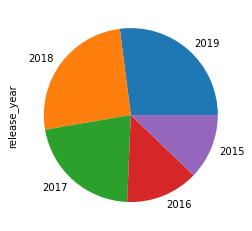

In [25]:
tv_show['release_year'].value_counts()[:5].plot(kind = 'pie')

<AxesSubplot:ylabel='release_year'>

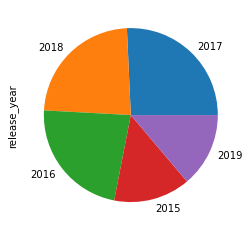

In [26]:
movies['release_year'].value_counts()[:5].plot(kind = 'pie')